In [ ]:
# p(poisonous) and e (edible) converted to 0 and 1

In [16]:
#Following avoids a warning for KMeans
%env OMP_NUM_THREADS=2

import warnings
warnings.filterwarnings('ignore')

# Standard libraries we always include
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)


from scipy.special import comb
import math
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

env: OMP_NUM_THREADS=2


In [2]:
from google.colab import files
uploaded_1 = files.upload()

Saving mushroom_dataset.csv to mushroom_dataset.csv


In [3]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded_1['mushroom_dataset.csv']))

** Checking out the dataset**

In [ ]:
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df1.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
df1.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [4]:
df1["is_duplicate"]= df1.duplicated()

# Note that when using f-strings, the internal quote character must be different, such as 'is_duplicate' above
print(f"#total= {len(df1)}")
print(f"#duplicated= {len(df1[df1['is_duplicate']==True])}")

#total= 8124
#duplicated= 0


In [ ]:
df1.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
is_duplicate                0
dtype: int64

In [5]:
# checking for unique values
for f in list(df1.columns.values):
    if df1[f].dtype == object:
        print(df1[f].unique()) 
# add name of columns later

['p' 'e']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['e' 'c' 'b' 'r' '?']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['s' 'n' 'a' 'v' 'y' 'c']
['u' 'g' 'm' 'd' 'p' 'w' 'l']


** All the columns (feature) are nominal. So, coverting each column into numerical values using get_dummies**

In [6]:
del df1['is_duplicate']

In [7]:
# Dumification

# Dumification of all colums except class because it is the label

# creating a new df without class column
df2 = df1.loc[:, df1.columns != 'class']
columns = df2.columns.values

# creating a df of s=just class column to be combined later
df3 = df1['class']
df6 = df3.replace('p',1)
df6 = df6.replace('e',0)

# changes
#df3['class'] = df3['class'].map({'p': 1, 'e': 0})
df5 = pd.get_dummies(df3)

# creating dummies using df2
df4 = pd.get_dummies(df2, prefix = columns)

df = pd.concat([df4, df6], axis=1)








In [ ]:
df.head()
df.shape

(8124, 118)

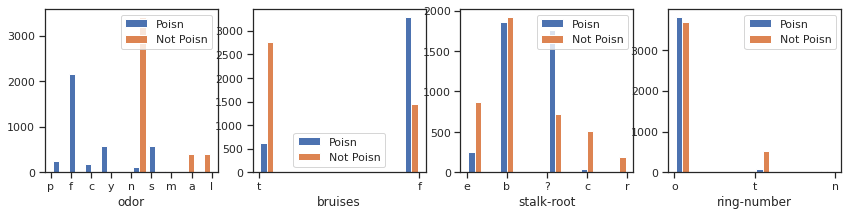

In [ ]:
# Data Exploration on dummfied data
def plt_var(_col):
    plt.hist([df1[df1['class']=='p'][_col],df1[df1['class']=='e'][_col]], label=['Poisn','Not Poisn'])    
    plt.xlabel(_col)
    plt.legend()    

plt.figure(figsize=(18, 3), dpi=72)
plt.subplot(1, 5, 1)
plt_var('odor')

plt.subplot(1, 5, 2)
plt_var('bruises')

plt.subplot(1, 5, 3)
plt_var('stalk-root')

plt.subplot(1, 5, 4)
plt_var('ring-number')



plt.show()


In [8]:
# Prepare the input X and y
dfX = df.loc[:, df.columns != 'class']
dfy = df.loc[:, df.columns == 'class'].values.ravel()

# Sanity check
print(f'N={len(dfX)}, M={len(dfX.columns)}')

N=8124, M=117


In [9]:
# Set our main data structures X and y
X = dfX.values
y = dfy



In [10]:
# 10-fold CV evaluation of a classifier
def eval_classifier(_clf, _X, _y):
    accuracies = []
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        accuracies += [accuracy_score(_y[test_index], y_pred)]
    return np.array(accuracies)


** Question: 1**

# 10 fold CV performances of 4 classifiers


In [22]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
acc = eval_classifier(GaussianNB(),X, y)
print(f'Naive Bayes CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')


Naive Bayes CV accuracy=0.91 ±0.086


In [23]:
# Linear SVC
from sklearn.svm import SVC
acc = eval_classifier(SVC(tol=10, kernel = 'linear', probability = True),                      X, y)
print(f'Linear SVC CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Linear SVC CV accuracy=0.48 ±0.000


In [24]:
# MLPC i.e basic neural network
from sklearn.neural_network import MLPClassifier
acc = eval_classifier(MLPClassifier(), X, y)
print(f'MLPC accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

MLPC accuracy=0.96 ±0.087


In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
acc = eval_classifier(DecisionTreeClassifier(), X, y)
print(f'Decision Tree accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')


Decision Tree accuracy=0.97 ±0.094


In [26]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
acc = eval_classifier(RandomForestClassifier(), X, y)
print(f'Random Forest accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')



Random Forest accuracy=0.97 ±0.094


** Question: 2 **
## Generating ensemble of 100 classifiers##


In [52]:
from sklearn.ensemble import BaggingClassifier

bag_nb = BaggingClassifier(base_estimator=GaussianNB, n_estimators=100)
bag_svc = BaggingClassifier(base_estimator=SVC(tol=10, kernel = 'linear', probability = True),n_estimators=100)
bag_mlpc = BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol = 1e-1,early_stopping=True),n_estimators=100)
bag_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 5, max_features=5),n_estimators=100)

# list of ensemble classifiers
E = [bag_nb, bag_svc, bag_mlpc, bag_dt]



In [48]:
# Performace of 1st classifier for each ensemble

def Performance(clf):
   
    bag = BaggingClassifier(base_estimator=clf,
                            n_estimators=100, 
                            max_samples=1.0, 
                            max_features=1.0, 
                            bootstrap=True, 
                            bootstrap_features=False, 
                            n_jobs=1, 
                            random_state=1)
    acc = eval_classifier(bag,X, y)
    mean_acc = np.mean(acc)
    std = np.std(acc)
    return acc[0]

perf_nb = Performance(GaussianNB())
perf_svc = Performance(SVC(tol=10, kernel = 'linear', probability = True))
perf_mlpc = Performance(MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol = 1e-1,early_stopping=True))
perf_dt = Performance(DecisionTreeClassifier(max_depth = 5, max_features=5))
print(f'Performace of the first classifier of Naive Bayes Ensemble is: {perf_nb:.2f}')
print(f'Performace of the first classifier of SVC Ensemble is: {perf_svc:.2f}')
print(f'Performace of the first classifier of MLPC Ensemble is: {perf_mlpc:.2f}')
print(f'Performace of the first classifier of Decision Tree Ensemble is: {perf_dt:.2f}')




Performace of the first classifier of Naive Bayes Ensemble is: 0.68
Performace of the first classifier of SVC Ensemble is: 0.52
Performace of the first classifier of MLPC Ensemble is: 0.69
Performace of the first classifier of Decision Tree Ensemble is: 0.69


** Question: 3**
## Fitting the ensemble classifiers on subsampled data ##

In [72]:
# creating subset of training data
# using 25% of data

def ensemble_fit(clf):

    df7 = df.sample(n=None, frac=0.25, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

    # Prepare the input X and y
    dfX = df7.loc[:, df.columns != 'class']
    dfy = df7.loc[:, df.columns == 'class'].values.ravel()



    # Set our main data structures X and y
    X = dfX.values
    y = dfy

    X_train, X_test, y_train, y_test =\
                train_test_split(X, y, 
                                test_size=0.2, 
                                random_state=1,
                                stratify=y)
   
    bag = BaggingClassifier(base_estimator=clf,
                            n_estimators=100, 
                            max_samples=1.0, 
                            max_features=1.0, 
                            bootstrap=True, 
                            bootstrap_features=False, 
                            n_jobs=1, 
                            random_state=1)
    
    
    bag = bag.fit(X_train, y_train)
    return bag

nb_fit = ensemble_fit(GaussianNB())
svc_fit = ensemble_fit(SVC(tol=10, kernel = 'linear', probability = True))
mlpc_fit = ensemble_fit(MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol = 1e-1,early_stopping=True))
dt_fit = ensemble_fit(DecisionTreeClassifier(max_depth = 5, max_features=5))



 

** Question: 4 **
## Predict function for ensemble classifiers ##

In [76]:
def ensemble_predict(bag):

    df7 = df.sample(n=None, frac=0.25, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)

    # Prepare the input X and y
    dfX = df7.loc[:, df.columns != 'class']
    dfy = df7.loc[:, df.columns == 'class'].values.ravel()



    # Set our main data structures X and y
    X = dfX.values
    y = dfy

    X_train, X_test, y_train, y_test =\
                train_test_split(X, y, 
                                test_size=0.2, 
                                random_state=1,
                                stratify=y)
    y_train_pred = bag.predict(X_train)
    y_test_pred = bag.predict(X_test)

    bag_train = accuracy_score(y_train, y_train_pred) 
    bag_test = accuracy_score(y_test, y_test_pred) 
    return ('%.3f' % (bag_test))

print(f'accuracy of ensemble of gaussian naive bayes is: {ensemble_predict(nb_fit)}')
print(f'accuracy of ensemble of SVC is: {ensemble_predict(svc_fit)}')
print(f'accuracy of ensemble of MLPC is: {ensemble_predict(mlpc_fit)}')
print(f'accuracy of ensemble of Decision Tree is: {ensemble_predict(dt_fit)}')

accuracy of ensemble of gaussian naive bayes is: 0.914
accuracy of ensemble of SVC is: 0.511
accuracy of ensemble of MLPC is: 0.968
accuracy of ensemble of Decision Tree is: 0.988


** Question: 5**
## Performance of ensembles with Subsampling##

In [121]:
ratios = [0.0005, 0.001, 0.005, 0.01, 0.03, 0.05, 0.1]

from sklearn.model_selection import cross_val_score
def performance(clf,r):

  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)
  
  bag = BaggingClassifier(base_estimator=clf,
                        n_estimators=500, 
                        max_samples=r, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)
  
  score = cross_val_score(estimator=bag,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
  mean_score = np.mean(score)
  return mean_score


In [122]:
# performace of all ensemble classifier with subsampling ration of 0.01
print(performance(DecisionTreeClassifier(max_depth = 5, max_features=5), 0.1))
print(performance(MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol = 1e-1,early_stopping=True), 0.1))
print(performance(SVC(tol=10, kernel = 'linear', probability = True), 0.1))
print(performance(GaussianNB(), 0.1))

0.9802923577974703
0.8811444368704082
0.5153942285844126
0.9224077861092177


In [125]:
# performace of all ensemble classifier with subsampling ration of 0.001
print(performance(DecisionTreeClassifier(max_depth = 5, max_features=5), 0.001))
#print(performance(MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol = 1e-1,early_stopping=True), 0.001))
#print(performance(SVC(tol=10, kernel = 'linear', probability = True), 0.001))
print(performance(GaussianNB(), 0.001))

0.511690524880709
0.511690524880709


When comparing, performances at ratio 0.001, decision tree and naive bayes have the same accuracy. I couldnt get MLPC and SVC to work at this ratio.

Whereas at ratio 0.1, all four classifiers worked. Decision Tree was the best followed by naive bayes.

** Question: 6 **
## Reports and Plots ##

In [102]:
# naive bayes performances
nb_perf = []
for r in ratios:
  score = performance(GaussianNB(), r)
  nb_perf.append(score)

print(nb_perf)


[0.5153942285844126, 0.511690524880709, 0.9045595697947437, 0.9297962584261154, 0.9587328637430887, 0.9667386200106037, 0.9224077861092177]


In [114]:
# SVC performances at various subsample ratios
svc_perf = []
for r in [0.01, 0.03, 0.05, 0.1]:
  score = performance(SVC(tol=10, kernel = 'linear', probability = True), r)
  svc_perf.append(score)

print(svc_perf)

[0.5153942285844126, 0.5153942285844126, 0.5153942285844126, 0.5153942285844126]


In [113]:
# MLPC performances at various subsample ratios
mlpc_perf = []
for r in [0.01, 0.03, 0.05, 0.1]:
  score = performance(MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol = 1e-1,early_stopping=True), r)
  mlpc_perf.append(score)

print(nb_perf)

[0.5153942285844126, 0.511690524880709, 0.9045595697947437, 0.9297962584261154, 0.9587328637430887, 0.9667386200106037, 0.9224077861092177]


In [105]:
# Decision Tree performances at various subsample ratios
dt_perf = []
for r in ratios:
  score = performance(DecisionTreeClassifier(max_depth = 5, max_features=5), r)
  dt_perf.append(score)

print(dt_perf)

[0.5153942285844126, 0.511690524880709, 0.8965273044005151, 0.9211770052260849, 0.9581307278648794, 0.9716844656517457, 0.9802923577974703]


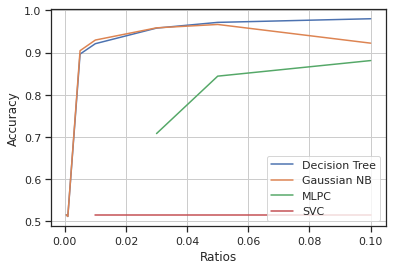

In [120]:
ratios_2 = [0.01, 0.03, 0.05, 0.1]
# Plot
plt.plot(ratios, dt_perf, label='Decision Tree')
plt.plot(ratios, nb_perf, label='Gaussian NB')
plt.plot(ratios_2, mlpc_perf, label='MLPC')
plt.plot(ratios_2, svc_perf, label='SVC')


plt.xlabel('Ratios')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

** Observations **
1) MLPC and SVC were giving errors at smaller ratios to had calculatre their performances only at 0.01, 0.03, 0.05, 0.1

2) Decision Tree's performance increases with increase in ratios and is 98% at 0.1. Also, it was the best performer

3) Performace of Gaussian Naive increases and then decreases with ratios. It is best at 0.05 at ~96%

4) The max performace of MLPC is at 0.1 subsampling ratio with accuracy close to 90%

5) SVC is worst with its performace hovering around 50% for all ratios